# Q4: Do Text Processing with provided text
Text originally from *Roma : the novel of ancient Rome / Steven Saylor.* The passage is available publicly [here](http://catdir.loc.gov/catdir/enhancements/fy0711/2006051179-s.html). 

#####  import libraries and pre-cleaning
Here we are going to install, import and read the passage saved as a txt file

In [ ]:
!pip install -r requirements.txt

In [42]:
import pandas as pd
import string as st
import nltk
import numpy as np

In [43]:
text = open('./text.txt','r')
text = text.read()


Here, we want to remove punctuation. Punctuations provided by string library in Python

In [44]:
st.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
# remove punctuations
def remove_punctuations(inp):
  punct = st.punctuation
  for character in st.punctuation:
    inp = inp.replace(character, '')
  inp = inp.replace('\n',' ')
  inp = inp.replace('’s','')
  inp = inp.replace('“','')
  inp = inp.replace('”','')
  inp = inp.replace("’",'')
  return inp

Using replace, and some regex, we're able to remove the punctuations. We also lower the caps, hence make it easier to process

In [46]:
text = remove_punctuations(text).lower()


##### Step 1: Remove stopwords
Stopwords is a collection of words that has less meaning. Each language has their own stopwords. By removing stopwords, prevents us to processing less meaning yet frequenty seen words. Here, we are using English language stopwords provided by NLTK library.

In [47]:
#stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/iganarendra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Split words into list of words

In [48]:
text_list = text.split(' ')
len(text_list)

1954

In [49]:
#remove stopwords
def remove_stopwords(text):
    return [word for word in text if word not in stop]

print(remove_stopwords(text_list))
text_list = remove_stopwords(text_list)

['chapter', 'one', 'stop', 'salt', 'route', '1000', 'bc', 'rounded', 'bend', 'path', 'ran', 'beside', 'river', 'lara', 'recognized', 'silhouette', 'fig', 'tree', 'atop', 'nearby', 'hill', 'weather', 'hot', 'days', 'long', 'fig', 'tree', 'full', 'leaf', 'yet', 'bearing', 'fruit', 'soon', 'lara', 'spotted', 'landmarks—an', 'outcropping', 'limestone', 'beside', 'path', 'silhouette', 'like', 'man', 'face', 'marshy', 'spot', 'beside', 'river', 'waterfowl', 'easily', 'startled', 'tall', 'tree', 'looked', 'like', 'man', 'arms', 'upraised', 'drawing', 'near', 'place', 'island', 'river', 'island', 'good', 'spot', 'make', 'camp', 'would', 'sleep', 'island', 'tonight', 'lara', 'back', 'forth', 'along', 'river', 'path', 'many', 'times', 'short', 'life', 'people', 'created', 'path—it', 'always', 'like', 'river—but', 'deerskinshod', 'feet', 'wooden', 'wheels', 'handcarts', 'kept', 'path', 'well', 'worn', 'lara', 'people', 'salt', 'traders', 'livelihood', 'took', 'continual', 'journey', 'mouth', 'riv

As we can see, some words got removed!

In [50]:
len(text_list)

1034

then we count each word appearance (bag of words)

In [51]:
bow = pd.Series(text_list)
bow.value_counts()

lara        27
river       25
larth       17
island      17
man         14
            ..
perceive     1
monsters     1
giants       1
images       1
perfect      1
Length: 630, dtype: int64

##### Step 2: Stemming:
Stemming converts tokenned words into their root form. For example from 'standing' to 'stand'. We stem each token so we simplify (once again) the words to be processed. Here we use PorterStemmer function from NLTK library.

In [52]:
#stemming, to convert tokens to their root form
from nltk import PorterStemmer
ps = PorterStemmer()
stemmed = [ps.stem(word) for word in bow]
stemmed

['chapter',
 'one',
 'stop',
 'salt',
 'rout',
 '1000',
 'bc',
 'round',
 'bend',
 'path',
 'ran',
 'besid',
 'river',
 'lara',
 'recogn',
 'silhouett',
 'fig',
 'tree',
 'atop',
 'nearbi',
 'hill',
 'weather',
 'hot',
 'day',
 'long',
 'fig',
 'tree',
 'full',
 'leaf',
 'yet',
 'bear',
 'fruit',
 'soon',
 'lara',
 'spot',
 'landmarks—an',
 'outcrop',
 'limeston',
 'besid',
 'path',
 'silhouett',
 'like',
 'man',
 'face',
 'marshi',
 'spot',
 'besid',
 'river',
 'waterfowl',
 'easili',
 'startl',
 'tall',
 'tree',
 'look',
 'like',
 'man',
 'arm',
 'uprais',
 'draw',
 'near',
 'place',
 'island',
 'river',
 'island',
 'good',
 'spot',
 'make',
 'camp',
 'would',
 'sleep',
 'island',
 'tonight',
 'lara',
 'back',
 'forth',
 'along',
 'river',
 'path',
 'mani',
 'time',
 'short',
 'life',
 'peopl',
 'creat',
 'path—it',
 'alway',
 'like',
 'river—but',
 'deerskinshod',
 'feet',
 'wooden',
 'wheel',
 'handcart',
 'kept',
 'path',
 'well',
 'worn',
 'lara',
 'peopl',
 'salt',
 'trader',
 '

Yep, all the tokens transformed into their root form

##### Step 3: Tokenizing
Tokenizing is a step when we 'token' (assign a number to) words. We tokenize words so the computer (which understands numbers better) could process each word easier. We are using NLTK as its also provide us with tokenizer for English languange.

In [53]:
nltk.download('punkt')
#connect all stemmed list's element into one string, then tokenize them
tokenized = nltk.word_tokenize(" ".join(stemmed))
tokenized

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/iganarendra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['chapter',
 'one',
 'stop',
 'salt',
 'rout',
 '1000',
 'bc',
 'round',
 'bend',
 'path',
 'ran',
 'besid',
 'river',
 'lara',
 'recogn',
 'silhouett',
 'fig',
 'tree',
 'atop',
 'nearbi',
 'hill',
 'weather',
 'hot',
 'day',
 'long',
 'fig',
 'tree',
 'full',
 'leaf',
 'yet',
 'bear',
 'fruit',
 'soon',
 'lara',
 'spot',
 'landmarks—an',
 'outcrop',
 'limeston',
 'besid',
 'path',
 'silhouett',
 'like',
 'man',
 'face',
 'marshi',
 'spot',
 'besid',
 'river',
 'waterfowl',
 'easili',
 'startl',
 'tall',
 'tree',
 'look',
 'like',
 'man',
 'arm',
 'uprais',
 'draw',
 'near',
 'place',
 'island',
 'river',
 'island',
 'good',
 'spot',
 'make',
 'camp',
 'would',
 'sleep',
 'island',
 'tonight',
 'lara',
 'back',
 'forth',
 'along',
 'river',
 'path',
 'mani',
 'time',
 'short',
 'life',
 'peopl',
 'creat',
 'path—it',
 'alway',
 'like',
 'river—but',
 'deerskinshod',
 'feet',
 'wooden',
 'wheel',
 'handcart',
 'kept',
 'path',
 'well',
 'worn',
 'lara',
 'peopl',
 'salt',
 'trader',
 '

In [54]:
len(tokenized)

1034

Okay! We have 1047 words got tokenized

##### Step 4: Lemmatization:
Lemmatization converts word to its dictionary base form but takes grammar and vocab into considerations. Here is the main difference of Lemmatization from Stemming. Stemming only takes the root without grammatical and vocabulary consideration. These techniques are really popular when processing text in English.

In [55]:
#lemmatization converts word to its dictionary base form, takes grammar and vocab into considerations
from nltk import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lem = WordNetLemmatizer()
lemmatized = [lem.lemmatize(x) for x in tokenized]
lemmatized

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/iganarendra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/iganarendra/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['chapter',
 'one',
 'stop',
 'salt',
 'rout',
 '1000',
 'bc',
 'round',
 'bend',
 'path',
 'ran',
 'besid',
 'river',
 'lara',
 'recogn',
 'silhouett',
 'fig',
 'tree',
 'atop',
 'nearbi',
 'hill',
 'weather',
 'hot',
 'day',
 'long',
 'fig',
 'tree',
 'full',
 'leaf',
 'yet',
 'bear',
 'fruit',
 'soon',
 'lara',
 'spot',
 'landmarks—an',
 'outcrop',
 'limeston',
 'besid',
 'path',
 'silhouett',
 'like',
 'man',
 'face',
 'marshi',
 'spot',
 'besid',
 'river',
 'waterfowl',
 'easili',
 'startl',
 'tall',
 'tree',
 'look',
 'like',
 'man',
 'arm',
 'uprais',
 'draw',
 'near',
 'place',
 'island',
 'river',
 'island',
 'good',
 'spot',
 'make',
 'camp',
 'would',
 'sleep',
 'island',
 'tonight',
 'lara',
 'back',
 'forth',
 'along',
 'river',
 'path',
 'mani',
 'time',
 'short',
 'life',
 'peopl',
 'creat',
 'path—it',
 'alway',
 'like',
 'river—but',
 'deerskinshod',
 'foot',
 'wooden',
 'wheel',
 'handcart',
 'kept',
 'path',
 'well',
 'worn',
 'lara',
 'peopl',
 'salt',
 'trader',
 '

##### Optional: Find most common word pairing:
This step helps us to identify the most common two words to be paired. For another passage this could be "sun" and "shines", or "back" and "forth". This adds up to the analysis using BigramCollocationFinder in NLTK's collocations.

In [56]:
#find top 2 combinations
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures as bigram_measure
COUPLES = 10

bigram = BigramCollocationFinder.from_words(tokenized)
for pairs in bigram.nbest(bigram_measure.likelihood_ratio, COUPLES):
  print(" + ".join(pairs))

lara + peopl
fig + tree
sunris + side
back + forth
salt + trader
respect + numina
silhouett + fig
hot + day
salt + bed
bank + island


##### Create word clouds
Word clouds will help us visualise most used word and helps us a lot in the analysis.

first, we reconstruct all lemmatized tokens into a passage again

In [57]:
processed_text = " ".join([word for word in lemmatized])

then, using wordcloud and matplotlib library, create wordcloud visualisation!

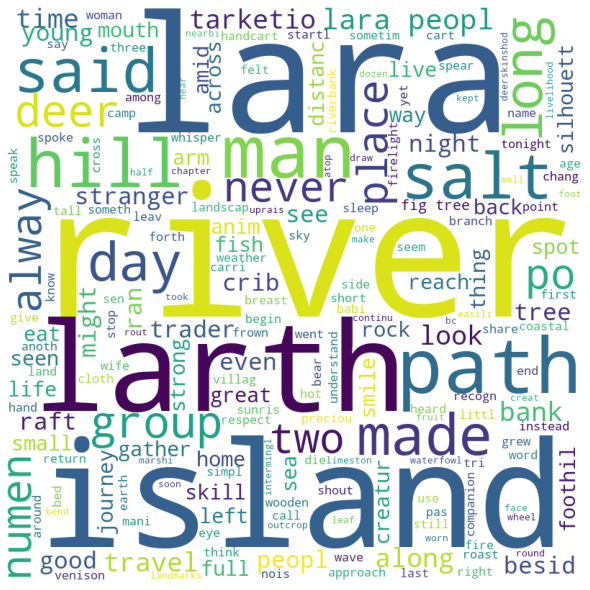

In [58]:
#word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(processed_text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()